<a href="https://colab.research.google.com/github/sajjad6ansari/genai/blob/main/ModelsExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normalisation example

In [2]:
import numpy as np

#sample data
data = np.array([10, 20, 30, 40, 50, 1000]) #1000 is outlier

#Min-Max scaling : scales values b/w 0 and 1
def min_max_scaling(data):
  min_val = np.min(data)
  max_val = np.max(data)
  return (data - min_val) / (max_val - min_val)

#Z-score  standardization : Mean = 0, Std Deviation = 1
def z_score_standardization(data):
  mean = np.mean(data)
  std_dev = np.std(data)
  return (data - mean) / std_dev

# Apply normalization techniques
min_max_scaled = min_max_scaling(data)
z_score_scaled = z_score_standardization(data)

#print results
print("Original Data:", data)
print("Min-Max Scaled:", min_max_scaled)
print("Z-Score Scaled:", z_score_scaled)# the +ve value is outlier



Original Data: [  10   20   30   40   50 1000]
Min-Max Scaled: [0.         0.01010101 0.02020202 0.03030303 0.04040404 1.        ]
Z-Score Scaled: [-0.50221883 -0.47457376 -0.44692869 -0.41928361 -0.39163854  2.23464343]


#**Example 1 : MNIST Handwritten Digits Classifcation**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8745 - loss: 0.4390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1249
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9821 - loss: 0.0593
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9863 - loss: 0.0434
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9733 - loss: 0.0846
Test accuracy: 97.69%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


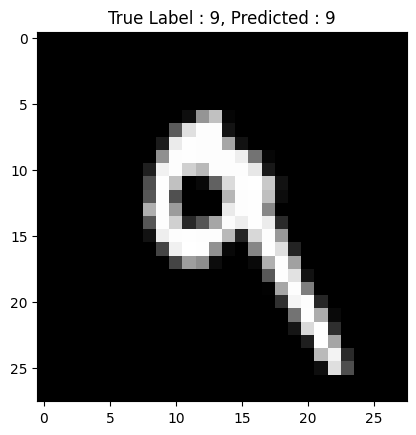

In [4]:

!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

# Dense Layers always except a 1D i/p, so whenever the preceding layer produces multi-dimentional o/p,
# we must flatten it to 1D before passing it to the Dense layer

#if the i/p to a dense layer is not already 1D, use flatten to convert it to 1D

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

predictions = model.predict(x_test)
#print(predictions)
#print('predictions shape : ', predictions.shape)

plt.imshow(x_test[7],cmap='grey')
plt.title(f"True Label : {y_test[7]}, Predicted : {np.argmax(predictions[7])}")
plt.show()



# Example 2 - House Price Prediction (Regression)






# **Synthetic Data**

In [4]:
# Example 2 - House price prediction (Regression)  with synthetic data
# Predict  house proces based on 10 numerical features
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 50000   #House prices b/w 0-500k

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 50000

# Build Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single o/p for regression
])

#compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train Model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

#Evaluate mode
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

#make predictions
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')

# MAE is around 243k-245k, which means on average, the predictions are off by near half of the actual house price
# This is very bad bcz an error of 243k  in a price of 500k  means  the model is almost random
# The dataset is  completely random, meaning there is no real pattern for the model to learn
# The model is guessing the house price randomly, which is why MAE is large
# In short, bad model

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 828341760.0000 - mae: 25204.8457
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 872310272.0000 - mae: 25705.6133
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 848857088.0000 - mae: 25251.0000
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 833355456.0000 - mae: 25023.4609
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 879858944.0000 - mae: 25842.8398
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 840610112.0000 - mae: 25265.6973
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 859388672.0000 - mae: 25423.2070
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 812064128.0000 - mae: 24632.3125
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 840054528.0000 - mae: 25341.9570
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 821890944.0000 - mae: 24878.9141
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 775561536.0000 - mae: 23807.1309
Epoch 12

**Synthetic Data and Normalization**

In [5]:
# Example 2 - House Price Prediction (Regression) with synthetic dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic  dataset (1000 samples, 10 features) in [0,1] ranges
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)   #House prices b/w 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) # Targets ranges in 0-1

# Build Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single o/p for regression
])

#compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train Model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

#Evaluate mode
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

#make predictions
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.4f}')
#this is also bad model  as we are still training  in random values (just the values the normalised)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2688 - mae: 0.4342
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0849 - mae: 0.2439
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0858 - mae: 0.2504
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0825 - mae: 0.2440
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808 - mae: 0.2414
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0811 - mae: 0.2436
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0827 - mae: 0.2483
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0807 - mae: 0.2420
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0865 - mae: 0.2541
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831 - mae: 0.2457
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0816 - mae: 0.2465
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0809 - mae: 0.2445
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

**Dataset from scikit-learn**

In [6]:
# Example 2 - House Price Prediction (Regression) with Dataset from scikit-learn

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#Load california housing dataset
data = fetch_california_housing()
x, y = data.data, data.target   #Features  and target (mediam house  value in 100,000s )

print(f'Target value Range (in 100,00s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}')

#Split the data  into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Normalize the features for better  training stability - Z_Score_Standardization/ Standard Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #compute mean  and std from  trainn=ing data then scale
x_test = scaler.transform(x_test) # use the same scaling parameter to transform test data


#we use same mean and std deviation  (computed from x_train ) to scale x_test
# This ensures the both the training and the test data follow the  same distribution

# if we include x_test while computing mean and std. deviation. the model gets the information from the test data before training
# This is called data leakage which can lead to unrealisticlly good performance on test data and poor on generalization to the new data
# Test Data should only  be used to for evaluation after the model is trained

# In real-world  applications, new data arrives after training, we do not  get to compute the mean and std  deviation for each new data point
# The model should be able to handle the unseen data  using the same scaling applied during the training

# Build Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)), #i/p features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single o/p for regression
])

#compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train Model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

#Evaluate mode
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}') #convert to actual dollars

#make predictions
sample_input = np.expand_dims(x_test[0], axis=0) #Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}') #convert to actual dollars


Target value Range (in 100,00s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5210 - mae: 0.8131
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4268 - mae: 0.4669
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3825 - mae: 0.4368
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3769 - mae: 0.4217
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3559 - mae: 0.4137
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3337 - mae: 0.4037
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3171 - mae: 0.3933
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3031 - mae: 0.3862
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3157 - mae: 0.3887
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2932 - mae: 0.3777
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2992 - mae: 0.3810
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2839 - mae: 0.3731
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━

**Example 3 - Sentiment Analysis (Binary Classification)**

# **Without Embedding layers**

In [3]:
# Exmample 3 - Sentiment Analysis (Binary Classification) Without Embedding layers
# classify whether a review is +ve or not

import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

#IMDB reviews  have different lenghts, but  dense expects a fixed length og neurons
# we are ensuring that every i/p is exactly 200 words

# Pad sequences to ensure fixed length i/p
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

#Build model using only Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)), #convert 2D sequence to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') #Binary classification
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
model.fit(x_train, y_train, epochs=5, batch_size=512)

#Evaluate mode
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%') #convert to actual dollars

#make predictions
predicted_sentiment = model.predict(x_test[0:1])

#print(f'x_test[0:1] = {x_test[0:1]}')
print(f'Predicted Sentiment:', "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5038 - loss: 28.2933
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5306 - loss: 7.9042
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5440 - loss: 4.3063
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5500 - loss: 2.6788
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5491 - loss: 1.5678
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5114 - loss: 1.3053
Test accuracy: 50.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
x_test[0:1] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 

# **With Embedding layer**
Embedding layer  *transforms  interger word indices into dense vector representation*



In [4]:
# Exmample 3 - Sentiment Analysis (Binary Classification) With Embedding layers
# classify whether a review is +ve or not

import tensorflow as tf
from tensorflow.keras import models, layers

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

#IMDB reviews  have different lenghts, but  dense expects a fixed length og neurons
# we are ensuring that every i/p is exactly 200 words

# Pad sequences to ensure fixed length i/p
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

#Build model using only Dense layers with an Embedding Layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200), #convert words indices into vectors
    layers.Flatten(), #flatten embedding into a 1D  vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') #Binary classification
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
model.fit(x_train, y_train, epochs=5, batch_size=512)

#Evaluate mode
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%') #convert to actual dollars

#make predictions
predicted_sentiment = model.predict(x_test[0:1])

#print(f'x_test[0:1] = {x_test[0:1]}')
print(f'Predicted Sentiment:', "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 374ms/step - accuracy: 0.5897 - loss: 0.6490
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - accuracy: 0.9244 - loss: 0.2050
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.9922 - loss: 0.0385
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 408ms/step - accuracy: 0.9992 - loss: 0.0052
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - accuracy: 0.9999 - loss: 0.0020
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8515 - loss: 0.5660
Test accuracy: 85.25%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Sentiment: Negative


# **Breast Cancer Prediction (Binary Classification)**

In [6]:
#Breast Cancer dataset from scikit-learn contains 569 samples with 30 numerical features extracted
# from digitalised images of breast mass tumors, The goal is to tumors as malignant(1) or benign(0)
# based on these feaures , the dataset as originally curated from Winconsin Diagonistic Breast Cancer (WDBC)
# dataset and is commonly used in bainary classification tasks in ML

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Load breast_cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target   #Features  and labels

#Split the data  into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #compute mean  and std from  trainn=ing data then scale
X_test = scaler.transform(X_test) # use the same scaling parameter to transform test data

# Build Model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #i/p features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1) #Binary Classification
])

#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5240 - loss: 2.8061 - val_accuracy: 0.9386 - val_loss: 0.1369
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8946 - loss: 0.8330 - val_accuracy: 0.9737 - val_loss: 0.0607
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9398 - loss: 0.2773 - val_accuracy: 0.9912 - val_loss: 0.0519
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9505 - loss: 0.2995 - val_accuracy: 0.9912 - val_loss: 0.0520
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.2244 - val_accuracy: 0.9912 - val_loss: 0.0521
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9584 - loss: 0.3140 - val_accuracy: 0.9825 - val_loss: 0.0531
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9663 - loss: 0.3080 - val_accuracy: 0.9825 - val_loss: 0.0546
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9611 - loss: 0.3595 - val_accuracy: 0.9825 - val_loss: 0.0571
E